# Project 1 - Exploring the Fourier transform

### Candidate number

10074

## Contents

Contents

## Packages

In [125]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Math tools
import numpy as np
import scipy as sc

# To read png files
from PIL import Image

## Introduction

...

L2*T ...h

inner prod


$$
    \langle f, g \rangle = \int_0^1 f(x)\overline{g(x)}dx    
$$


## Task 1 - The Discrete Fourier Transform

### 1a)

We consider the functions $e^{2\pi kx}, k\in\mathbb{Z}, x\in\mathbb{T}$. 

**Claim:** For any $k, h\in\mathbb{Z}$ we have:

$$
    \langle e^{2\pi i k \cdot}e^{2\pi i h \cdot}\rangle 
    = \begin{cases} 1 & \textrm{if }k=h \\ 0 & \textrm{else.} \end{cases}
$$

**Proof:** We compute:

$$
    \begin{align*} 
        \langle e^{2\pi i k \cdot},e^{2\pi i h \cdot}\rangle 
        &= \int_0^1 e^{2\pi i k x}e^{-2\pi i h x}dx \\
        &= \int_0^1 e^{2\pi i (k-h) x}dx \\
        &= \begin{cases}    \int_0^1 e^0dx & \textrm{if }k=h \\ 
                            \frac{1}{2\pi i (k-h)}\left[e^{2\pi i (k-h) x}\right]_0^1 & \textrm{else} 
            \end{cases} \\
        &= \begin{cases}    1 & \textrm{if }k=h \\ 
                            0 & \textrm{else.} 
            \end{cases}
    \end{align*}
$$

<div style="text-align: right"> ▢ </div>

### 1b)

We consider the following functions from $\mathbb{T}$:

$$
\begin{align*}
    &\sqrt{2}\sin{(2\pi m x)}, m=1,2,\dots, \\
    &\sqrt{2}\cos{(2\pi 0 x)}, \\
    &\sqrt{2}\cos{(2\pi n x)}, n=1,2,\dots. \\
\end{align*}
$$

**Claim:** $\{ ... \}$ form an orthonormal system

**Recall:** In our proof we will need the following tools:

TODO trig formulae

**Proof:** We compute:

For $n\in\{1, 2, \dots\}$ and $m\in\{0, 1, \dots\}$ we have:

$$
    \begin{align*} 
        \langle \sqrt{2}\sin{(2\pi n\cdot)}, \sqrt{2}\cos{(2\pi m\cdot)}\rangle 
        &= 2\int_0^1\sin{(2\pi nx)}\cos{(2\pi mx)}dx \\
        &= 2\int_0^1\frac{1}{2}(\sin{(2\pi nx-2\pi mx)}+\sin{(2\pi nx+2\pi mx)})dx \\
        &= \begin{cases}    
        
            \int_0^1\sin{(2\pi (n-m)x)}+\sin{(2\pi (n+m)x)}dx 
            & \textrm{if }m\ne n \\ 
            
            \int_0^1\sin{0}+\sin{(4\pi nx)}dx 
            & \textrm{if } m=n 
            \end{cases} \\
        &= 0.
    \end{align*}
$$

In the last equality we relise that we are integrating $\sin$ over a multiple of it's period to get 0. Similarly for $n,m\in\{1, 2, \dots\}$ we have:

$$
    \begin{align*} 
        \langle \sqrt{2}\sin{(2\pi n\cdot)}, \sqrt{2}\sin{(2\pi m\cdot)}\rangle 
        &= 2\int_0^1\sin{(2\pi nx)}\sin{(2\pi mx)}dx \\
        &= 2\int_0^1\frac{1}{2}(\cos{(2\pi nx-2\pi mx)}-\cos{(2\pi nx+2\pi mx)})dx \\
        &= \begin{cases}    
        
            \int_0^1\cos{(2\pi (n-m)x)}-\cos{(2\pi (n+m)x)}dx 
            & \textrm{if }m\ne n \\ 
            
            \int_0^1\cos{0}+\cos{(4\pi nx)}dx 
            & \textrm{if } m=n 
            \end{cases} \\
        &= \begin{cases}    
        
            0 & \textrm{if }m\ne n \\ 
            
            1 & \textrm{if }m=n. 
            \end{cases} 
    \end{align*}
$$

Again we integrate $\cos$ over some multiple of its period. This time we get $1$ in the bottom case since $\cos{0}=1$. Finally, for $n,m\in\{1, 2, \dots\}$

$$
    \begin{align*} 
        \langle \sqrt{2}\cos{(2\pi n\cdot)}, \sqrt{2}\cos{(2\pi m\cdot)}\rangle 
        &= 2\int_0^1\cos{(2\pi nx)}\cos{(2\pi mx)}dx \\
        &= 2\int_0^1\frac{1}{2}(\cos{(2\pi nx-2\pi mx)}+\cos{(2\pi nx+2\pi mx)})dx \\
        &= \begin{cases}    
        
            \int_0^1\cos{(2\pi (n-m)x)}+\cos{(2\pi (n+m)x)}dx 
            & \textrm{if }m\ne n \\ 
            
            \int_0^1\cos{0}+\cos{(4\pi nx)}dx 
            & \textrm{if } m=n\ne0 \\
            
            \int_0^1\cos{0}+\cos{0}dx 
            & \textrm{if } m=n=0
            
            \end{cases} \\
        &= \begin{cases}    
        
            0 & \textrm{if }m\ne n \\ 
            
            1 & \textrm{if }m=n\ne0 \\
            
            2 & \textrm{if }m=n=0. 
            \end{cases} 
    \end{align*}
$$

Again we integrate over periods. We get at additional case since we can have $m=n=0$. In the previous calculation we had $m, n \geq1$.

Note that by the sesquilinearity of the inner product ... TODO n, m = 0 cases TODO

$$


### 1c)

We introduce the following spaces:

$$
\begin{align*}
    \mathcal{T}_n &\overset{\textrm{def}}{=} 
        \textrm{span}(e^{-2\pi i n \cdot}, \dots, e^{2\pi i n \cdot})\\
        &=\left\{ f \vert f(x)=\sum_{k=-n}^{n} c_ke^{2\pi i k x}, \textrm{ where }c_i\in \mathbb{C} \right\}, \\

    \mathcal{S}_n &\overset{\textrm{def}}{=} 
        \textrm{span}(\cos(0\cdot), \cos(2\pi\cdot),\dots,\cos(2\pi n\cdot), \sin(2\pi\cdot), \dots \sin(2\pi n \cdot)) \\
        &=\left\{ f \vert f(x)=\frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(2\pi k x)+ b_k\cos(2\pi k x), 
        \textrm{ where }a_i, b_j \in \mathbb{R} \right\}.

\end{align*}
$$

**Orthonormal bases**

From a) and b) we have the following orthonormal bases for these spaces:

TODO

**Equality of the spaces**

TODO

**Dimension of $\mathcal{T}_n$**

TODO

### 1d) 

**Claim:** The Fourier coefficients of $f\in \mathcal{S}_n$ can be computed as:

$$
\begin{align*}
    a_k &= 2\langle f, \cos(2\pi k \cdot) \rangle = 2\int_{-\frac{1}{2}}^{\frac{1}{2}}f(x)\cos(2\pi k x) dx,\quad k=0,1,\dots, n, \\

    b_k &= 2\langle f, \sin(2\pi k \cdot) \rangle = 2\int_{-\frac{1}{2}}^{\frac{1}{2}}f(x)\sin(2\pi k x) dx,\quad k=1,\dots, n.
\end{align*}
$$

**Proof:**

TODO

**Remarks**

### 1e) 

We want to approximate the integral in the Fourier coefficients $c_k(f)$ by using the composite trapezoidal rule with $N\in\mathbb{N}$ equidistant points $x_0, \dots, x_{N-1}$ where $x_j=\frac{j}{N}$. For brevity we denote $f_j=f(x_j)$ and $\boldsymbol{f}=(f_0, ..., f_{N-1})$.

**Deduction of approximation**

The expression for $c_k(f)$ is:

$$
    c_k(f) = \langle f, e^{2\pi k i \cdot}\rangle = \int_0^1 f(x) e^{-2\pi k i x}dx
$$

The composite trapezoidal rule reads:

$$
\begin{align*}
    \hat{f}_k &\overset{\textrm{def}}{=}
    \sum_{j=0}^{N-1} \frac{1}{2}(f_{j+1}e^{-2\pi k i x_{j+1}}+f_je^{2\pi j i x_k})\overset{\frac{1}{N}}{\overbrace{(x_{j+1}-x_j)}} \\
    
    &=\frac{1}{2N}(f_0e^{2\pi k i 0}+2f_1e^{2\pi k i \frac{1}{N}}+2f_2e^{2\pi k i \frac{2}{N}}+
    \dots+2f_{N-1}e^{2\pi ki\frac{N-1}{N}}+f_0e^{2\pi k i 1})\\
    
    &=\frac{1}{N}\sum_{j=0}^{N-1} f_je^{-2\pi jik/N}.
\end{align*}
$$

We have used that $f_N=f(x_N)=f(\frac{N}{N})=f(1)=f(0)=f_0$.

TODO

**Periodicity of the $\hat{f}_k$'s:** 

The $\hat{f}_k$ are $N$-periodic, that is $\hat{f}_k=\hat{f}_{k+N}$ for all $k\in\mathbb{Z}$:

$$
\begin{align*}
    \hat{f}_{k+N} 
    
    &=\frac{1}{N}\sum_{j=0}^{N-1} f_je^{-2\pi ji(k+N)/N} 

    &=\frac{1}{N}\sum_{j=0}^{N-1} f_je^{-2\pi jik/N}\overset{=1}{\overbrace{e^{-2\pi jik}}} = \hat{f}_k.

\end{align*}
$$


TODO - meaning for approximation

once we have computed the N ,... we have all the coefficients???


**Remarks:**

discrete fourier transform (DFT), fast fourier transform (FFT)

### 1f)

**Claim:** For $N\in \mathbb{N}$ and $k\in \mathbb{Z}$ we have:

$$
    \frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i j k/N} = 
    \begin{cases}
        1 & \textrm{if } k \equiv 0 \mod N, \\
        0 & \textrm{else.}
    \end{cases}
$$

**Proof:**

If $k \equiv 0 \mod N$ we can write $k=mN$ for some $m\in\mathbb{Z}$. Then:

$$
    \frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i j k/N}
    = \frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i j mN/N}
    = \frac{1}{N}\sum_{j=0}^{N-1}\overset{1}{\overbrace{e^{-2\pi i j m}}} 
    = 1.
$$

In the other case, use the formula for the finite geometric series (okay since now $e^{-2\pi i k/N}\ne 1$):

$$
    \frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i j k/N}
    = \frac{1}{N}\sum_{j=0}^{N-1} (e^{-2\pi i k/N})^j
    = \frac{1}{N}\frac{\overset{1}{\overbrace{(e^{-2\pi i k/N})^{N}}}-1}{e^{-2\pi i k/N}-1} 
    = 0.
$$
<div style="text-align: right"> ▢ </div>

### 1g) 

We now collect the DFT into a matrix $\mathcal{F}_N$, such that $\hat{\boldsymbol{f}}=\frac{1}{N}\mathcal{F}_N\boldsymbol{f}$. To achieve this $\mathcal{F}\in\mathbb{C}^{N\times N}$ is given by:

$$
    \mathcal{F}_N = \left( e^{-2\pi i k l /N} \right)_{k,l=0}^{N-1}.
$$

Further, for a vector $\boldsymbol{a}=(a_0, \dots, a_{N-1})^T$ the *circulant matrix*:

$$
    \textrm{circ }\boldsymbol{a} 
    
    = \left(a_{k-l\mod N}\right)_{k,l=0}^{N-1}

    = 
    \begin{pmatrix}
        a_0     & a_{N-1} & \dots  & a_2 & a_1    \\
        a_1     & a_0     & \dots  & a_3 & a_2    \\
        \vdots  &         & \ddots &     & \vdots \\
        a_{N-1} & a_{N-2} & \dots  & a_1 & a_0
    \end{pmatrix}.
$$

**Claim:** $\mathcal{F_N}$ diagonalizes the circulant matrix in this manner:

$$
    \textrm{circ } \boldsymbol{a} 
    
    = \overline{\mathcal{F}_N} \textrm{diag}({\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N,
$$

where $\textrm{diag}(\cdot)$ denotes the diagonal matrix.

**Proof:**

We compute:

$$
    ({\mathcal{F}_N\boldsymbol{a}})_k 
    
    = \sum_{l=0}^{N-1} (\mathcal{F}_N)_{kl}a_l

    = \sum_{l=0}^{N-1} a_le^{-2\pi i k l /N}.
$$

This gives:

$$
    (\textrm{diag}({\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N)_{kl}   
    
    = \sum_{m=0}^{N-1} \overset{=0\textrm{ if }k\ne m}{\overbrace{\textrm{diag}({\mathcal{F}_N\boldsymbol{a}})_{km}}} (\mathcal{F}_N)_{ml}

    = ({\mathcal{F}_N\boldsymbol{a}})_k(\mathcal{F}_N)_{kl}.
$$

Finally:

$$
\begin{align*}
    (\overline{\mathcal{F}_N} \textrm{diag}({\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N)_{kl} 
    
    &= \sum_{m=0}^{N-1}
        (\overline{\mathcal{F}_N})_{km} 
        (\textrm{diag}({\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N)_{ml} \\

    &= \sum_{m=0}^{N-1}
        (\overline{\mathcal{F}_N})_{km} 
        ({\mathcal{F}_N\boldsymbol{a}})_m
        (\mathcal{F}_N)_{ml} \\

    &= \sum_{m=0}^{N-1} \left(
        e^{2\pi i k m / N} 
        e^{-2\pi i m l / N}
        \sum_{l=0}^{N-1} a_le^{-2\pi i m l /N}
        \right) \\

    &= \sum_{m=0}^{N-1} \left(
        \sum_{l=0}^{N-1} a_le^{-2\pi i m (2l-k) /N}
        \right) \\

    &= \sum_{l=0}^{N-1} \left(
        a_l 
        \overset{
            \begin{subarray}{l}
            = 1 \,\Leftrightarrow 2l-k\equiv 0 \mod N \\
            \quad\Leftrightarrow l\equiv k-l \mod N
            \end{subarray}
        }
            {\overbrace{
        \sum_{m=0}^{N-1} e^{-2\pi i m(2l-k) /N}
        }}
        \right) \\

    &= a_{k-l \mod N} \\

    &= (\textrm{circ }\boldsymbol{a})_{kl}.
\end{align*}
$$

<div style="text-align: right"> ▢ </div>

**Inverse of $\mathcal{F}_N$**

Since 

TODO derive inverse



<!-- We begin by noting that $(\textrm{circ }\boldsymbol{a})^{-1} = \overline{\mathcal{F}_N} \textrm{diag}(\boldsymbol{1}_N⊘{\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N$:

$$
    (\textrm{circ }\boldsymbol{a})(\textrm{circ }\boldsymbol{a})^{-1}

    = \overline{\mathcal{F}_N} \textrm{diag}({\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N
    \overline{\mathcal{F}_N} \textrm{diag}(\boldsymbol{1}_N⊘{\mathcal{F}_N\boldsymbol{a}})\mathcal{F}_N

    = ...
$$

TODO DETAILS

So:

$$
    \mathcal{F}_N^{-1} = C^{-1} \overline{\mathcal{F}_N}D=
$$


Also compute
$$
    (\mathcal{F}_N\overline{\mathcal{F}_N})_{kl} 
    
    = \sum_{m=0}^{N-1} e^{-2\pi i km/N} e^{2\pi i ml/N}

    = \sum_{m=0}^{N-1} e^{-2\pi i m(k-l)/N}

    = \begin{cases}
        N & \textrm{if } k-l\equiv 0 \mod N \\
        0 & \textrm{else}
    \end{cases}
$$ -->

### 1h) 

From the tutorial at:

    https://docs.scipy.org/doc/scipy/tutorial/fft.html,

we know that $\textrm{sc.fft.fft(x)}$ returns \sum_... TODO



In [126]:
# Define transform
def transform(f, N, start = 0.0):
    
    nodes = np.linspace(start, start+1, N, endpoint=False) # Last point = start + 1 - 1/N
    f_vals = f(nodes)

    return nodes, f_vals

def DFT(x, div_by_N = True):
    
    N=1
    if div_by_N:
        N = len(x)
    
    return 1/N * sc.fft.fft(x)

We now consider the four functions

$$
\begin{align*}
    f_1(x) &= \sin(8\pi x)\\
    f_2(x) &= \sin(32\pi x) + \cos(128\pi x)\\
    f_3(x) &= x \\
    f_4(x) &= 1- |x|.
\end{align*}
$$

We evenly sample $N=4, 16, 256$ values from the interval $\mathbb{T}=[x_0, x_0+1)$, i.e. we take the values:

$$
    x = x_0, x_0 + \frac{1}{N}, ..., x_0 + \frac{N-1}{N} = x_0+1- \frac{1}{N}
$$

In this problem we use $x_0 = \frac{1}{2}$.

(Note: I choose not to use $N=5, 17, 257$, as these seems handpicked to be used with the endpoint included.)

In [127]:
# Define the functions to experiment with
funcs = [
    {
        "name"       : "f_1",
        "expression" : "\sin(8\pi x)",
        "function"   : lambda x : np.sin(8*np.pi*x)
    },
    {
        "name"       : "f_2",
        "expression" : "\sin(32\pi x) + \cos(128\pi x)",
        "function"   : lambda x : np.sin(32*np.pi*x) + np.cos(128*np.pi*x)
    },
    {
        "name"       : "f_3",
        "expression" : "x",
        "function"   : lambda x : x
    },
    {
        "name"       : "f_4",
        "expression" : "1-|x|",
        "function"   : lambda x : 1 - np.abs(x)
    },
]

# Define N values and other parameters to experiment with
# N = [5, 17, 257]
# Use N-1 instead because I sample without the endpoint
N = [4, 16, 256]
start = -0.5


We want to compute the DFT $\hat{\boldsymbol{f}}$ of $\boldsymbol{f}$.

The question of how well $\boldsymbol{f}$ approximates of $f$ is answered by ...

TODO

Also must compute ...

In [128]:
# TODO: plot fbold and fboldhat side by side...








# When does fbold approximate f well?

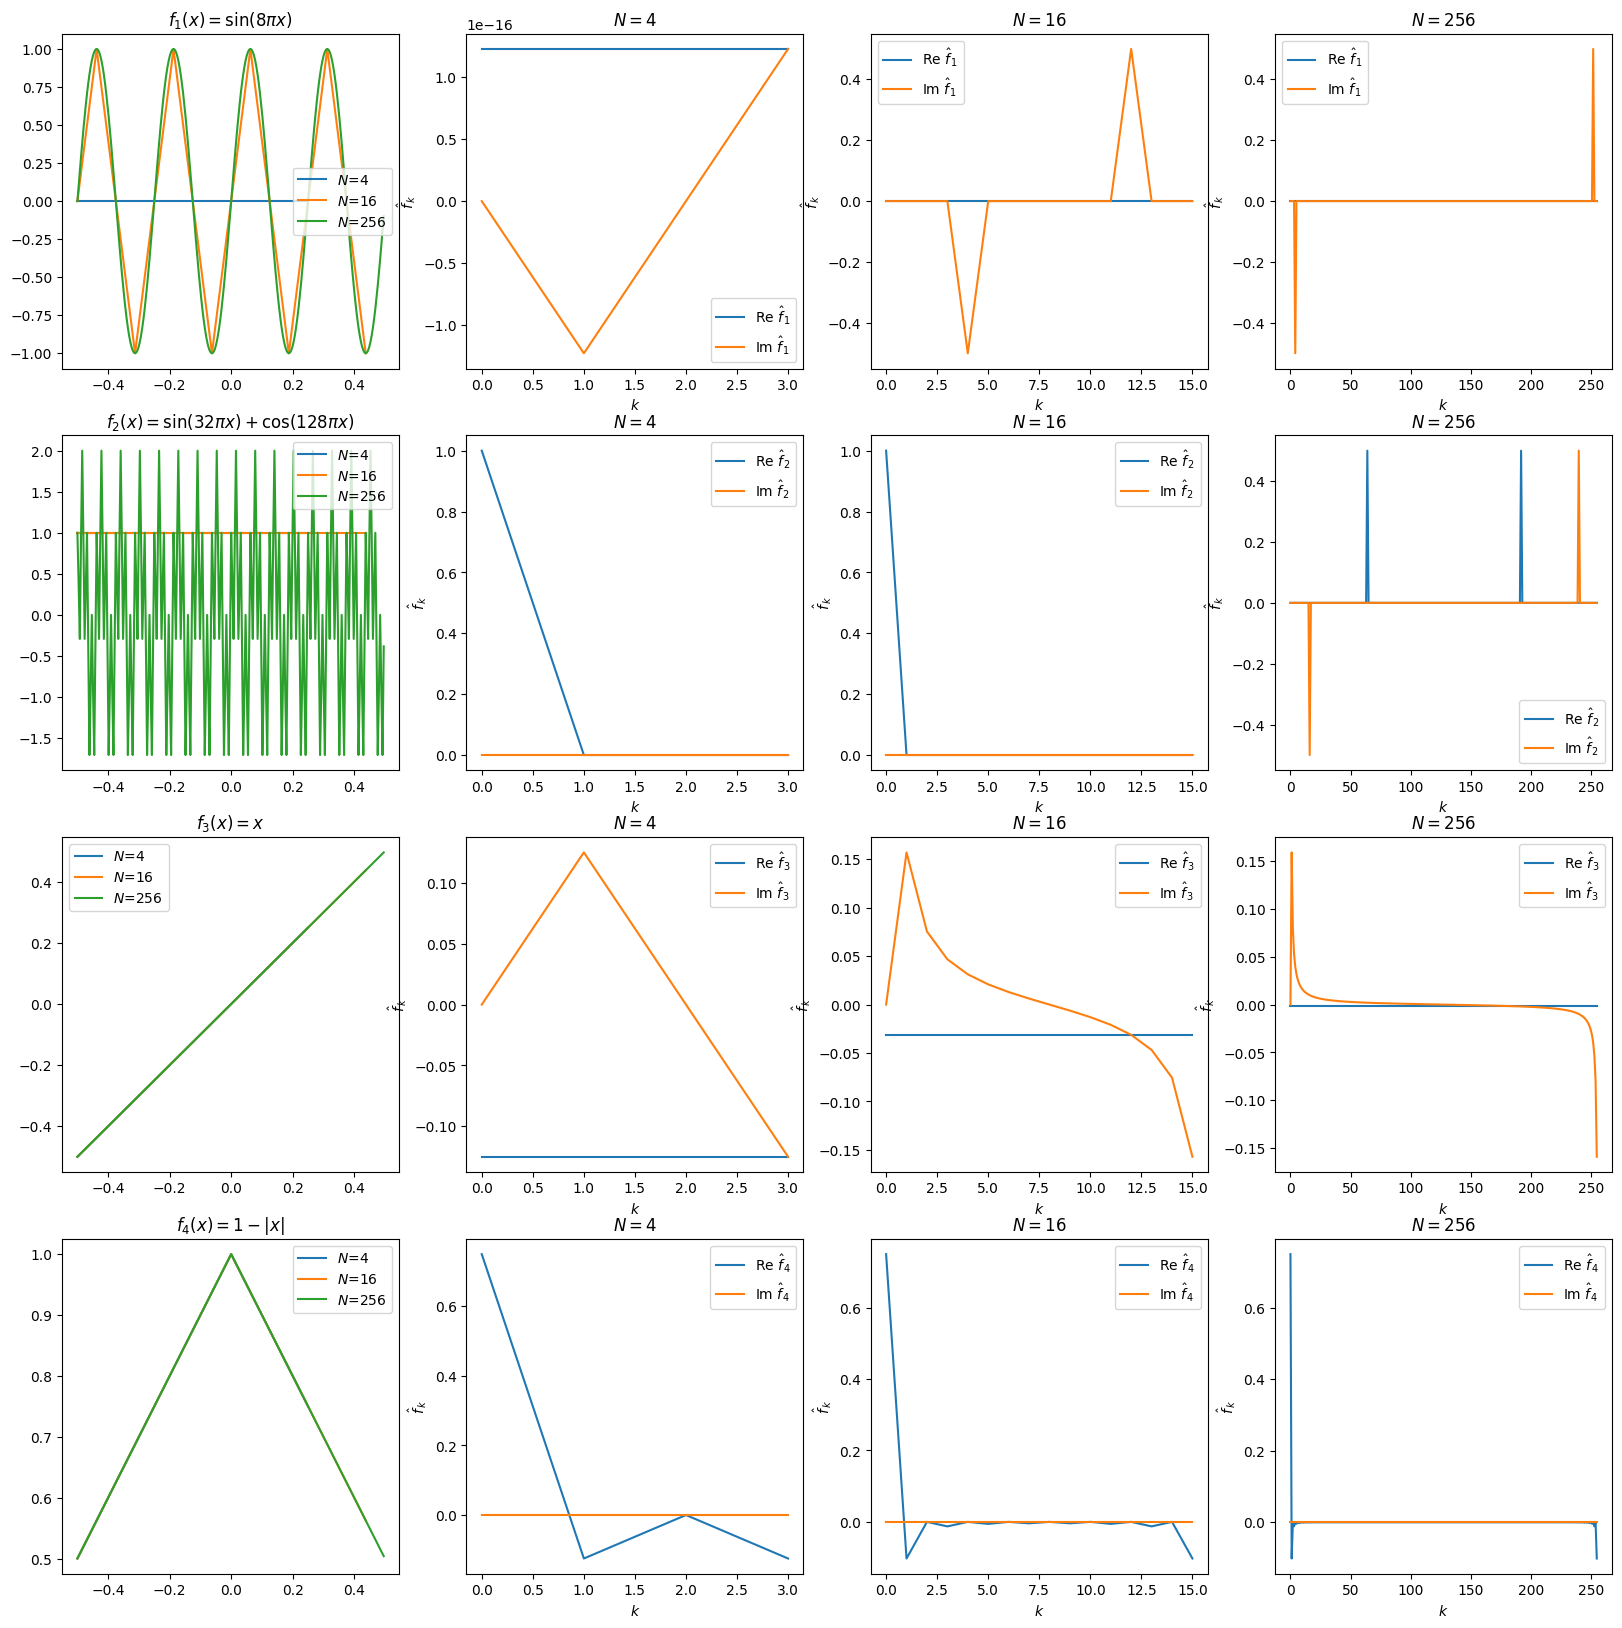

In [129]:

# Run and plot experiment
fig, ax = plt.subplots(len(funcs), 1+len(N), figsize=(5*len(funcs), 5*(len(N)+1)))

for i in range(len(funcs)):
    f = funcs[i]["function"]
    ax[i][0].set_title(f"${funcs[i]['name']}(x) = {funcs[i]['expression']}$")
    # ax[i][0].plot(np.linspace(start, start+1, 1000), f(np.linspace(start, start+1, 1000)))

    for j in range(len(N)):

        # Add transformed plot
        nodes, f_bold = transform(f, N[j], start=start)
        ax[i][0].plot(nodes, f_bold, label = f"$N$={N[j]}")

        # Add ...        
        f_hat = DFT(f_bold)
        ax[i][j+1].plot(f_hat.real, label = f"Re $\hat {funcs[i]['name']}$")
        ax[i][j+1].plot(f_hat.imag, label = f"Im $\hat {funcs[i]['name']}$")

        ax[i][j+1].legend()
        ax[i][j+1].set_title(f"$N = {N[j]}$")
        ax[i][j+1].set_xlabel(f"$k$")
        ax[i][j+1].set_ylabel(f"$\hat f_k$")

    ax[i][0].legend()

plt.show()

In [130]:


# # Run and plot experiment
# fig, ax = plt.subplots(len(N), len(funcs), figsize=(5*len(funcs), 5*len(N)))

# for j in range(len(funcs)):
#     f = funcs[j]["function"]
#     ax[0][j].set_title(f"${funcs[j]['name']}(x) = {funcs[j]['expression']}$")

#     for i in range(len(N)):
#         nodes = np.linspace(start, start+1-1/N[i], N[i])
        
#         f_vals = f(nodes)
#         ax[i][j].plot(nodes, f_vals, label = f"${funcs[j]['name']}$")
        
#         f_hat = transform(f, N[i], start = start)
#         ax[i][j].plot(nodes, f_hat.real, label = f"Re $\hat {funcs[j]['name']}$")
#         ax[i][j].plot(nodes, f_hat.imag, label = f"Im $\hat {funcs[j]['name']}$")

#         # ax[i][j].set_ylim(1.2*min(f_vals), 1.2*max(f_vals))

#         ax[i][j].legend()

# plt.show()

### 1i) 

We consider $f_2$. TODO...

* plot disc fourier coeff after fftshift fort N = 

* a_k, b_k without integral

* c_k without integral

* what does fftshift do

* Eusing Euler, use coefficients to "remove" the second summand by modifiyng fhat N=257

* No the same for N=17


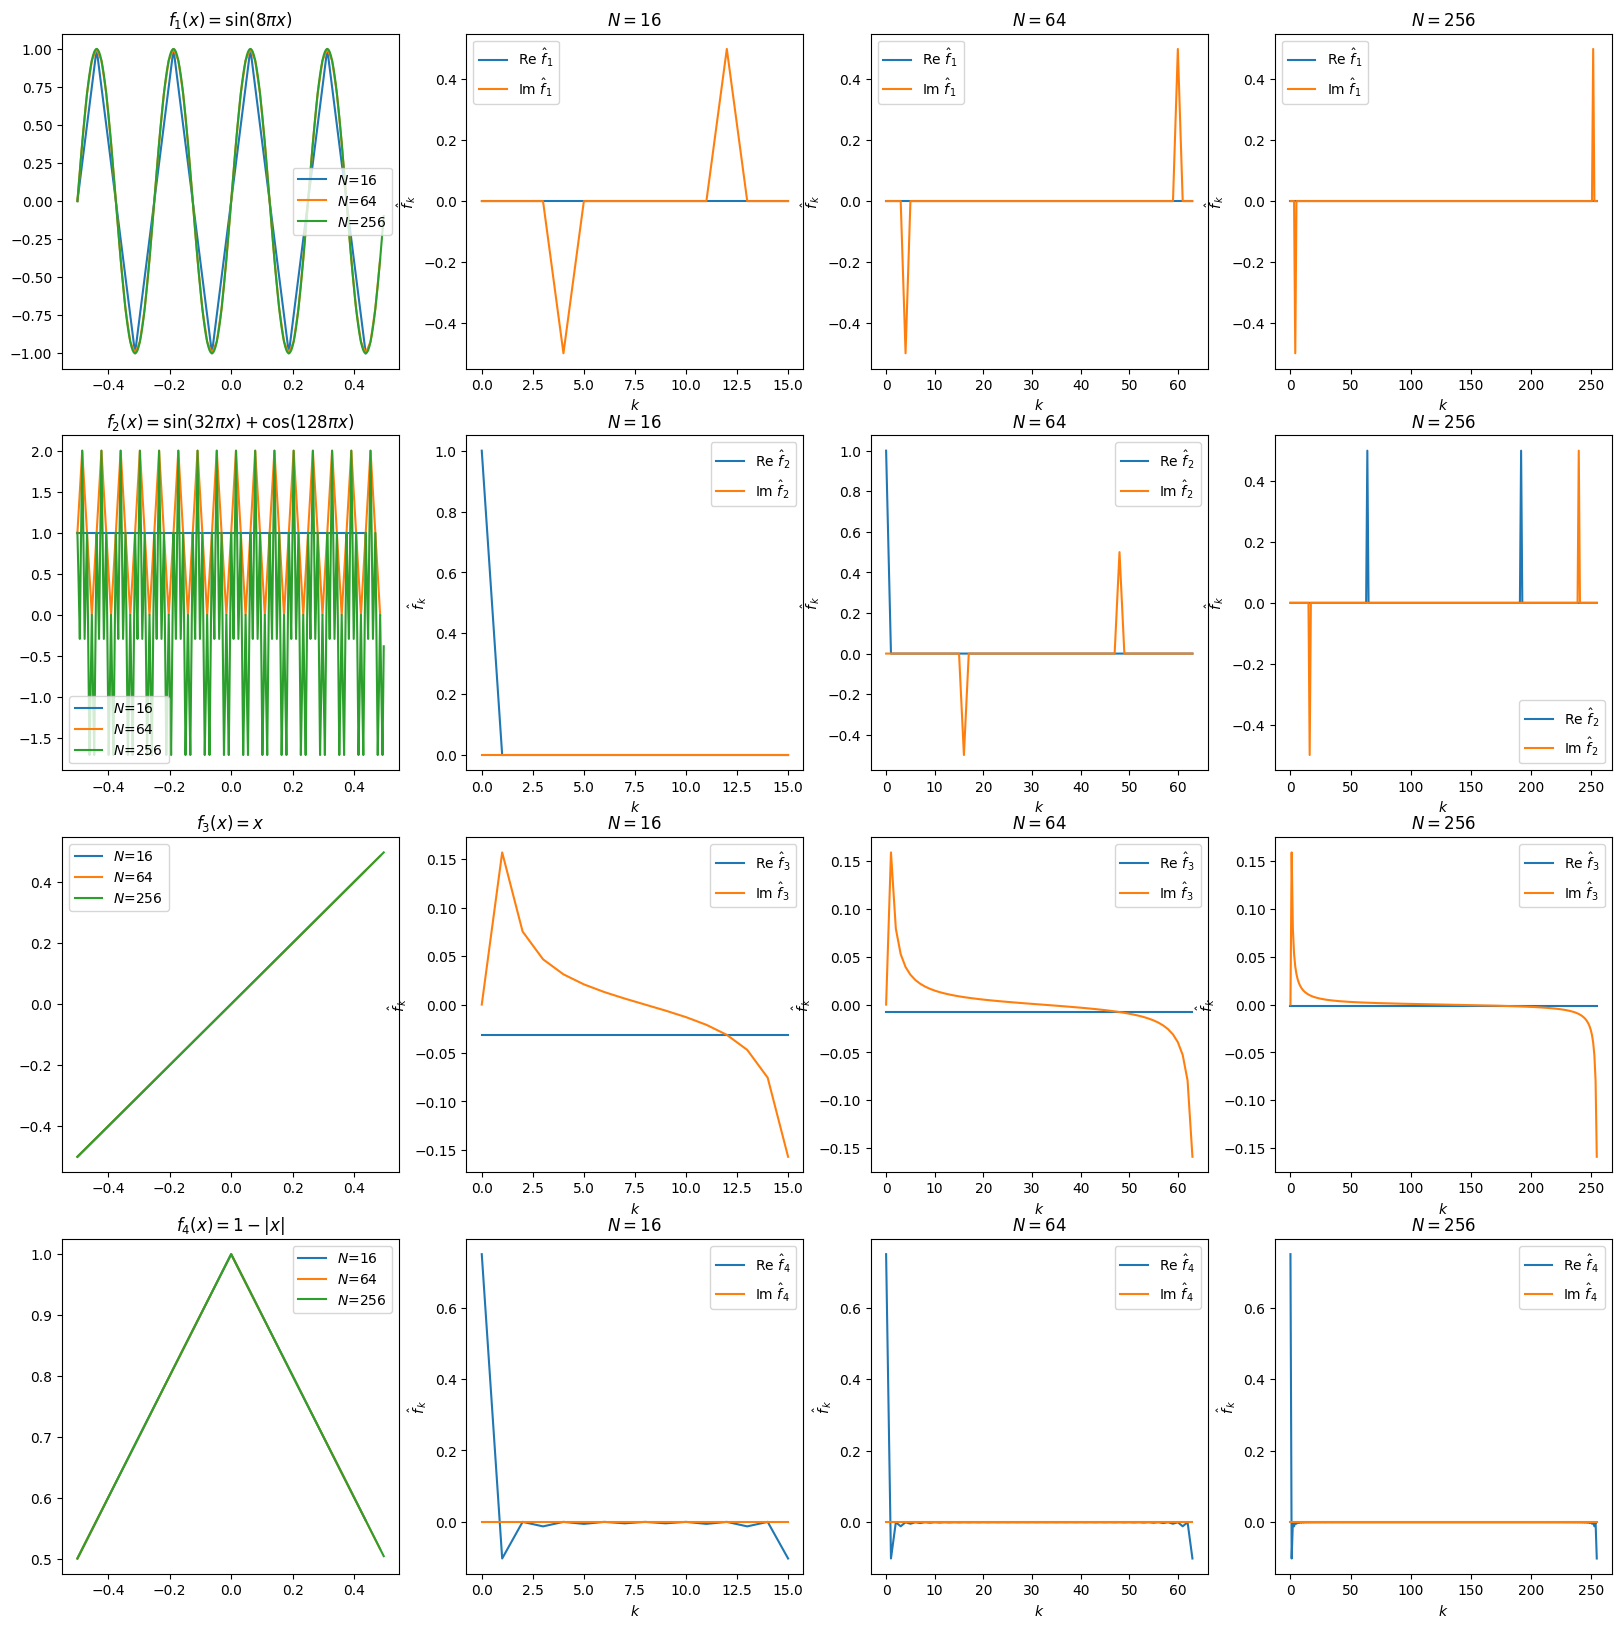

In [131]:
# Run and plot experiment
N = [16, 64, 256]

fig, ax = plt.subplots(len(funcs), 1+len(N), figsize=(5*len(funcs), 5*(len(N)+1)))

for i in range(len(funcs)):
    f = funcs[i]["function"]
    ax[i][0].set_title(f"${funcs[i]['name']}(x) = {funcs[i]['expression']}$")
    # ax[i][0].plot(np.linspace(start, start+1, 1000), f(np.linspace(start, start+1, 1000)))

    for j in range(len(N)):

        # Add transformed plot
        nodes, f_bold = transform(f, N[j], start=start)
        ax[i][0].plot(nodes, f_bold, label = f"$N$={N[j]}")

        # Add ...        
        f_hat = DFT(f_bold)
        ax[i][j+1].plot(f_hat.real, label = f"Re $\hat {funcs[i]['name']}$")
        ax[i][j+1].plot(f_hat.imag, label = f"Im $\hat {funcs[i]['name']}$")

        ax[i][j+1].legend()
        ax[i][j+1].set_title(f"$N = {N[j]}$")
        ax[i][j+1].set_xlabel(f"$k$")
        ax[i][j+1].set_ylabel(f"$\hat f_k$")

    ax[i][0].legend()

plt.show()

## Task 2 - Signal Processing

In this task we study signall processing. We write signals as vectors $\boldsymbol{a}=(a_0,\dots,a_{N-1})\in\mathbb{R}^N$, and want to work with them in the frequency domain as $\hat{\boldsymbol{a}}=\frac{1}{N}\mathcal{F}_N\boldsymbol{a}$.

We will consider the signals as samples from a periodic functions. The (periodic) convolution is given by:

$$
    (f * g) (x) = \int_\mathbb{T} f(y)g(x-y)dx = \int_0^1 f(y)g(x-y)dy.
$$

For our signal $\boldsymbol{a}$ the *cyclic convolution* of $\boldsymbol{a}, \boldsymbol{b}$ is given by:

$$
    (\boldsymbol{a}*\boldsymbol{b})_j = \sum_{k=0}^{N-1}a_k b_{j-k \mod N}.
$$

For an input $\boldsymbol{a}$, if $\boldsymbol{b}$ is used to modify $\boldsymbol{a}$ with convolution, we refer to $\boldsymbol{b}$ as a *filter* and say that the convolution "filters a signal".     

### 2a)

**Question:** What happens to $\boldsymbol{c}=\boldsymbol{a}*\boldsymbol{b}$ if we instead use a shifted $\boldsymbol{b}' = (b_{N-1}, b_0, \dots, b_{N-2})$?

**Answer:**

We begin by noting that the $n$'th component of $\boldsymbol{b}$ corresponds to the $(n+1)$'th component (modulo $N$) of $\boldsymbol{b}'$. With this we compute:

$$
    \boldsymbol{c}'_j 
    = (\boldsymbol{a}*\boldsymbol{b}')_j 
    = \sum_{k=0}^{N-1}a_k b'_{j-k \mod N} 
    = \sum_{k=0}^{N-1}a_k b_{j-k-1 \mod N}.
$$

This shows that the weights from $\boldsymbol{b}$ in the convolution gets shifted. For a simple / extreme example consider: 

$$
    b_j 
    = \begin{cases}
    1 & \textrm{if } j = 0 \\
    0 & \textrm{if } j \ne 0
    \end{cases},

    \quad

    b_j' 
    = \begin{cases}
    1 & \textrm{if } j = 1 \\
    0 & \textrm{if } j \ne 1
    \end{cases}.
$$

In this case we get: TODO

$$
    c_j 
    = \begin{cases}
    1 & \textrm{if } j = 0 \\
    0 & \textrm{if } j \ne 0
    \end{cases},

    \quad TODO

    c_j' 
    = \begin{cases}
    1 & \textrm{if } j = 1 \\
    0 & \textrm{if } j \ne 1
    \end{cases}.
$$


### 2b)

**Claim:** For $f,g\in L_1(\mathbb{T})$ we have:

$$
    \forall k \in \mathbb{Z} \quad c_k(f*g) = c_k(f)c_k(g).
$$

**Proof:** 

We compute:

$$
\begin{align*}
    c_k(f*g)
    &= \int_0^1 (f*g)(x) e^{-2\pi i k x} dx \\
    &= \int_0^1 \int_0^1 f(y)g(x-y) dy e^{-2\pi i k x} dx \\
    &= \int_0^1 \int_0^1 f(y)g(x-y) e^{-2\pi i k x} dy  dx \\
    &= \int_0^1 e^{-2\pi i k y}f(y)\int_0^1 g(x-y) e^{-2\pi i k (x-y)} dx  dy \\
    &= \int_0^1 e^{-2\pi i k y}f(y) \overset{c_k(g)}{\overbrace{\int_{-y}^{1-y} g(u) e^{-2\pi i k (u)} du}}  dy \\
    &= c_k(g)\cdot \int_0^1 e^{-2\pi i k y}f(y) dy \\
    &= c_k(f)c_k(g).
\end{align*}
$$

In the text above the integral after the third last equality we use the periodicity of $g$ and $e^{2\pi i k (u)}$ to recognise this as the $k$'th Fourier coefficient of $g$.

<div style="text-align: right"> ▢ </div>

**Claim:** For signals we similarly have:

$$
    \widehat{\boldsymbol{a}*\boldsymbol{b}} = \hat{\boldsymbol{a}} \circ \hat{\boldsymbol{b}}
$$

**Proof:** We compute for any component $k$:

$$
\begin{align*}
    (\widehat{\boldsymbol{a}*\boldsymbol{b}})_k 

    &= \sum_{j=0}^{N-1} (\boldsymbol{a}*\boldsymbol{b})_j e^{-2\pi i j k / N }\\

    &= \sum_{j=0}^{N-1} \sum_{l=0}^{N-1}a_l b_{j-l \mod N} e^{-2\pi i j k / N }\\

    &= \sum_{l=0}^{N-1} \left( a_l e^{-2\pi i l k / N } 
            \sum_{j=0}^{N-1} b_{j-l \mod N} e^{-2\pi i (j-l) k / N } \right)\\

    &= \sum_{l=0}^{N-1} \left( a_l e^{-2\pi i l k / N } 
        \overset{\hat{\boldsymbol{b}}}{\overbrace{\sum_{j=0}^{N-1} b_{j-l \mod N} e^{-2\pi i (j-l\mod N) k / N }}} 
        \overset{1}{\overbrace{e^{-2\pi i k MN  / N }}} \right)\\

    &= \hat{b}_k \sum_{l=0}^{N-1} a_l e^{-2\pi i l k / N } 
        \\

    &= \hat{a}_k\hat{b}_k

\end{align*}
$$

After the fourth equality we draw out $MN$ from $j-l$ to get the remainder $j-l \mod N$. What remains in the sum then corresponds exactly to each term in the sum for $\hat{b}_k$. 

Since this computation holds for all components, we have the desired result.

<div style="text-align: right"> ▢ </div>

**Question:** *How does this help with / simply the computation of $(\textrm{circ }\boldsymbol{a})(\textrm{circ }\boldsymbol{b})$?*

**Claim:** $(\textrm{circ }\boldsymbol{a})(\textrm{circ }\boldsymbol{b}) = \textrm{circ }\boldsymbol({a*b}).$

**Proof:** This proof is inspired by the proof on p. 140 of TODO CITE

TODO



<div style="text-align: right"> ▢ </div>


### 2c)

We consider the Dirichlet kernel

$$
    D_n(x) = 1 + 2 \sum_{j=1}^{n} \cos(2\pi j x), \quad n\in \mathbb{N}.
$$

We compute the Fourier coefficients. If $k = 0$ we get:

$$
\begin{align*}
    c_0(D_n) 
    &= \int_0^1 D_n(x) dx 

    &= \int_0^1 1 dx + 2 \sum_{j=1}^{n}\int_0^1  \cos(2\pi j x)dx 

    &= 1 + 0 = 1.
\end{align*}
$$

Before computing $c_k(D_n)$ we consider the following integral for $k\in\mathbb{Z}\setminus \{0\}, j\in \mathbb{N}\setminus{0}$:

$$
\begin{align*}
    I(j, k) 
    &= \int_0^1  \cos(2\pi j x) e^{-2\pi i k x} dx \\
    &= \frac{1}{2\pi}\int_0^{2\pi}  \cos(j x) (\cos(k x) - i \sin(k x)) dx \\
    &= \frac{1}{2\pi}\int_0^{2\pi}  \cos(j x) \cos(k x) - i \cos(j x)\sin(k x) dx \\
    &= \frac{1}{4\pi}\int_0^{2\pi}  \cos((j-k) x) + \cos((j+k) x) - i(-\sin((j-k)x)+\sin((j+k)x)) dx \\
    &= 
    \frac{1}{4\pi}\left(\begin{cases} 
        2\pi & j=k \\ 0 & j\ne k
    \end{cases}
    +\begin{cases} 
        2\pi & j=-k \\ 0 & j\ne -k
    \end{cases} + 0 + 0\right)
    = \begin{cases} 
        \frac{1}{2} & j=\pm k \\ 0 & j\ne \pm k
    \end{cases}.
\end{align*}
$$

Where the integrals of $\sin$ vanish in all cases (we either integrate $0$ or we integrate sine over a multiple of its period.). Assume now $k\ne 0$. We find:

$$
\begin{align*}
    c_k(D_n) 

    &= \int_0^1 \left( 1  + 2 \sum_{j=1}^{n} \cos(2\pi j x)  \right)e^{-2\pi i k x} dx\\

    &= \int_0^1 e^{-2\pi i k x} dx + 2 \sum_{j=1}^{n} I(j,k)\\

    &= 0 + 2 \sum_{j=1}^{n} 
    \begin{cases} 
        \frac{1}{2} & j=\pm k \\ 0 & j\ne \pm k
    \end{cases} \\

    &=  
    \begin{cases} 
        1 & |k|\in\{1,2,\dots,n\} \\ 0 & \textrm{else.}
    \end{cases} \\

\end{align*}
$$

In conclusion:

$$
    c_k(D_n) = 
    \begin{cases} 
        1 & |k|\in\{0,1,\dots,n\} \\ 0 & \textrm{else.}
    \end{cases} \\
$$

state why ... TODO

**Question**

????????????????????? TODO WHY EASIER TO DEFINE DIRECTLY IN FREQUENCY DOMAIN


Assume now we have equidistant samples and that we want to use $d_j \overset{\textrm{def}}{=}D_n(\frac{j}{N}), j=0,\dots,N-1$ as a filter. We can compute:

$$
    \hat{\boldsymbol{d}} = \frac{1}{N} \sum_{j=0}^{N-1}d_je^{-2\pi i j k / N }
$$

### 2d)

We sample $f_2$ with $N=512$ samples. 



In [132]:
# Get the function for easy access and define D_n(x)
f2 = lambda x    : funcs[1]["function"](x)
Dn = lambda x, n : 0*x + 1 + 2*sum([np.cos(2*np.pi*k*x) for k in range(0, n)]) # 0*x ensures right shape when n = 0

# Define the convolution we want
def convolve(a, b):
    """
    Returns the cyclic convolution of a, b defined as:
    (a*b)_j = sum_{k=0}^{N-1} a_{k}b_{j-k  mod N}
    """
    N = len(a)
    convolution = np.zeros(N)

    for j in range(N):
        convolution[j] = sum([a[k]*b[(j-k) % N] for k in range(N)])

    return convolution

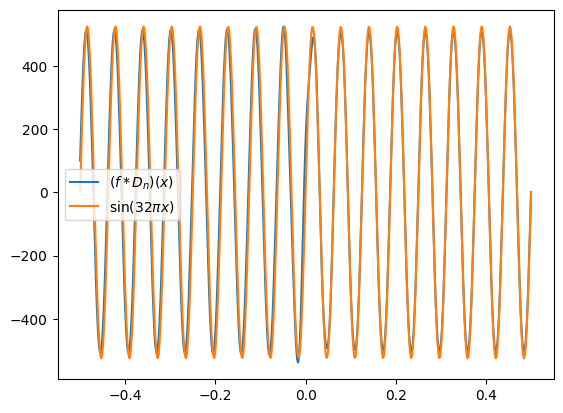

In [133]:
# Take 512 samples
n = 512
samples = np.linspace(-0.5, 0.5, n)
f2_samples = f2(samples)
Dn_samples = Dn(samples, 48)

# Compute
convolution = convolve(f2_samples, Dn_samples)

# Plot the convolution
plt.plot(samples, convolution, label = r"$(f*D_n)(x)$")
plt.plot(samples, np.sin(32*np.pi*samples)*max(convolution), label = r"$\sin(32\pi x)$")
plt.legend()
plt.show()

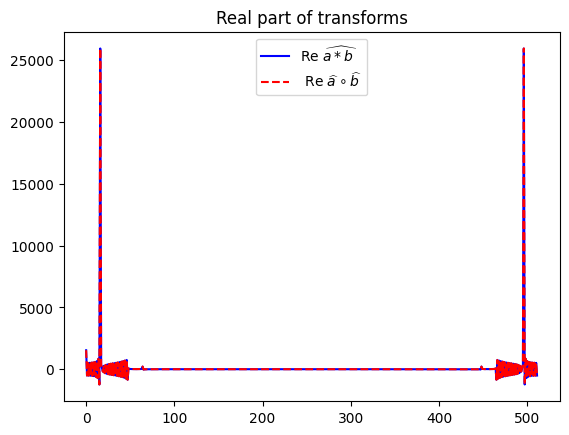

In [134]:
# Compute the DFT in two ways

transformed_convolution = DFT(convolution, div_by_N=False).real
product_of_transformed  = (DFT(f2_samples, div_by_N=False)*DFT(Dn_samples, div_by_N=False)).real

plt.plot(transformed_convolution, "b",   label = r"Re $\widehat{a*b}$")
plt.plot(product_of_transformed,  "r--", label = r" Re $\widehat{a}\circ \widehat{b}$")
plt.legend()
plt.title("Real part of transforms")
plt.show()


In [135]:
# TODO. Do convolution in frequency domain and map back with IFFT??

### 2e)



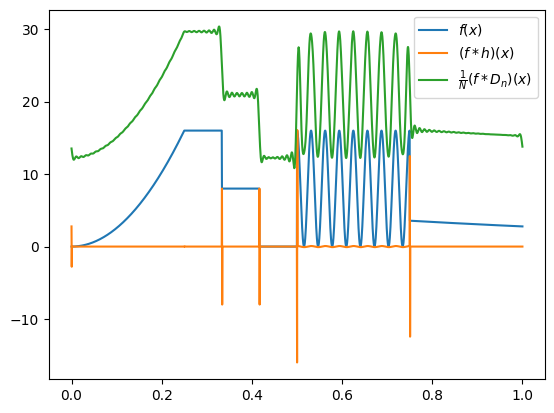

In [136]:
import csv

# We read the data from file
file_path = 'project1-data/project1-1e-data.csv'

x_values, signal_values = [], []

with open(file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        x_values.append(float(row['x']))
        signal_values.append(float(row['signal']))

x_values, signal_values = np.array(x_values), np.array(signal_values)

# Define filter h
def h(N):
    """
    Returns [-1, 2, -1, 0, 0, 0, ..., 0] with given length N>=3
    """
    return np.array([-1., 2., -1.] + list(np.zeros(N-3)))


# Compute the two filtered variants
N = len(x_values)
h_filtered  = convolve(signal_values, h(N))
Dn_filtered = convolve(signal_values, Dn(x_values, 92))

plt.plot(x_values, signal_values, label = r"$f(x)$")
plt.plot(x_values, h_filtered, label = r"$(f*h)(x)$")
plt.plot(x_values, 1/N * Dn_filtered, label = r"$\frac{1}{N}(f*D_n)(x)$")
plt.legend()
plt.show()

### 2f)

We have seen that as a filter, $D_n$ "picks out" the frequencies $0, 2\pi, 4\pi, \dots, n2\pi$. The opposite would "remove" these frequencies. 

frequencies in 0, ..., n  = Dn * f

frequencies not in 0, ..., n = f - Dn * f

### 2g)

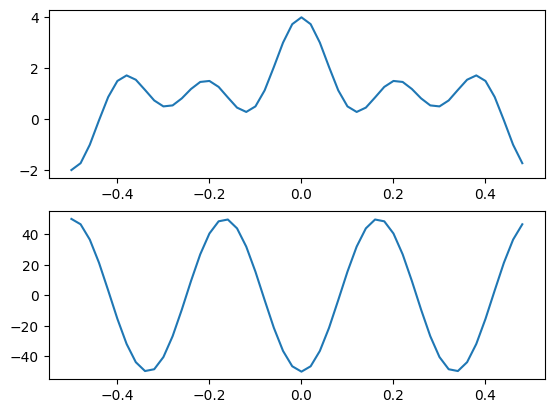

In [137]:
def filter_freq(x, y, k0, k1):
    

    return convolve(y, Dn(x, k1)) - convolve(y, Dn(x, k0-1))

f5 = lambda x : 1 + np.cos(2*np.pi*x) + np.cos(3*2*np.pi*x) + np.cos(5*2*np.pi*x)

x_values = np.linspace(-0.5, 0.5, 50, endpoint=False)
y_values = f5(x_values)

fig, ax = plt.subplots(2, 1)
ax[0].plot(x_values, y_values)
ax[1].plot(x_values, filter_freq(x_values, y_values, 3, 4))
plt.show()

## Task 3 - Image Processing

In this task we consider

$$f:\mathbb{T}^2\rightarrow\mathbb{C},$$

i.e. functions that are $T=1$-periodic in both arguments. We sample points $x_{j_1, j_2} = (\frac{j_1}{N_1}, \frac{j_2}{N_2}), j_i = 0, \dots, N_i-1$. This gives the sampled *image* $F=\left( f(x_{j_1, j_2}) \right)_{j_1, j_2 = 0}^{N_1-1, N_2-1}\in \mathbb{R}^{N_1\times N_2}$. We consider each entry a *pixel* when it takes a values in $[0,1]$ (black, white). 

We define the multivariate Fourier transform as:

$$
\begin{equation}
    \hat{F}_{k_1, k_2} \overset{\textrm{def}}{=} \sum_{j_1 = 0}^{N_1 -1}\sum_{j_2 = 0}^{N_2 -1}
    F_{j_1, j_2} e^{-2\pi i (j_1 k_1 / N_1 + j_2 k_2 / N_2)},
    \quad k_i = 0,\dots N_i-1.
\end{equation}
$$

### 3a)

**Claim:** Equation (1) can be computed in $\mathcal{O}(N_1N_2\log(N_1N_2))$. 

**Proof:**

Recall that the 1D Fourier transform can be computed in $\mathcal{O}(N)$. Write:

$$
\begin{align*}
\hat{F}_{k_1, k_2} 
    &= \sum_{j_1 = 0}^{N_1 -1}\sum_{j_2 = 0}^{N_2 -1}
    F_{j_1, j_2} e^{-2\pi i (j_1 k_1 / N_1 + j_2 k_2 / N_2)} \\

    &= \sum_{j_1 = 0}^{N_1 -1} \left( e^{-2\pi i j_1 k_1 / N_1} 
    % \overset{\textrm{Computed for every } k_2 \textrm{ in }\mathcal{O}(N_2\log(N_2))}
    \overset{G(j_1, k_2)}
    {\overbrace{
    \sum_{j_2 = 0}^{N_2 -1} F_{j_1, j_2} e^{-2\pi i j_2 k_2 / N_2}  
    }}\right) \\
    
    &= \sum_{j_1 = 0}^{N_1 -1} e^{-2\pi i j_1 k_1 / N_1} G(j_1, k_2) \\

\end{align*}
$$

We notice that for fixed $j_1$, computing $G(j_1, k_2)$ for each $k_2=0, \dots, N_2-1$, corresponds to a 1D FFT with runtime complexity $\mathcal{O}(N_2 \log (N_2))$. Doing it for each $j_1$ then gives $\mathcal{O}(N_1 N_2 \log (N_2))$. 

Finally for a fixed $k_2$, computing the final sum for each $k_1$ is done by another FFT with runtime complexity $\mathcal{O}(N_1 \log (N_1))$. Again, doing it for all $k_2$ gives $\mathcal{O}(N_2 N_1 \log (N_1))$. In total we have done:

$$
    \mathcal{O}(N_1 N_2 \log (N_2)) + \mathcal{O}(N_2 N_1 \log (N_1)) = \mathcal{O}(N_1 N_2 \log (N_1) \log(N_2)).
$$

<div style="text-align: right"> ▢ </div>

### 3b)

We consider the function:

$$
    f(\boldsymbol{x}) = 1 + \frac{1}{2} \sin(2\pi \boldsymbol{x}^T\boldsymbol{k}), \quad \boldsymbol{x}\in[0,1]^2,
$$

for the three cases $\boldsymbol{k}\in\{(5,0)^T,(0,10)^T,(8,8)^T\}$. Note that the choice of values ensures $f(\boldsymbol{x})\in [0,1]$.

We note that this function takes values in $[0.5, 1.5]$, but we map this to $[0, 1]$ to get a grayscale image.

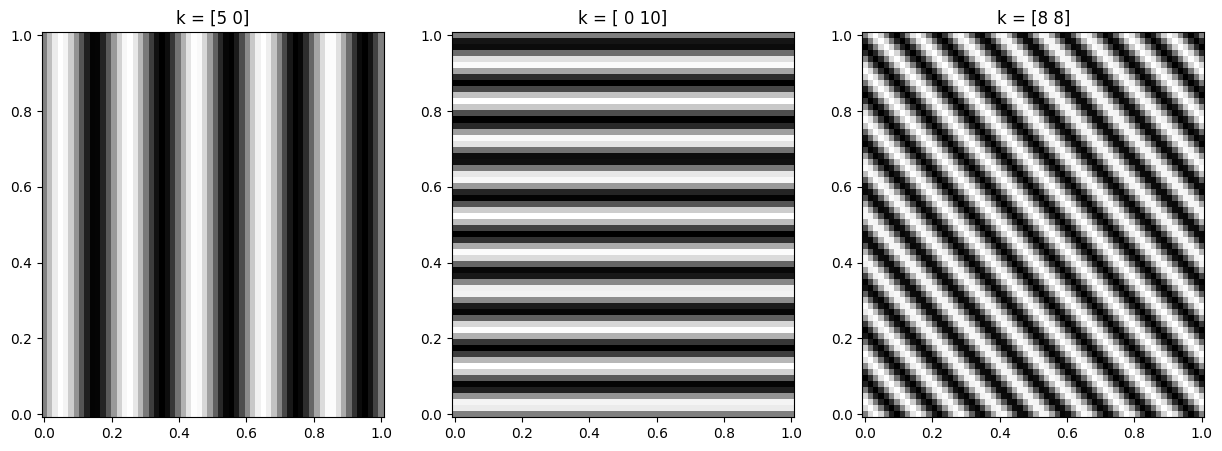

In [138]:
# Define function
def f(X, Y, k):
    return  1 + 1/2 * np.sin(2*np.pi*(X*k[0] + Y*k[1]))

k_vals = [np.array([5,0]), np.array([0,10]), np.array([8,8])]

# Initialise grid
N = 64
x_vals = np.linspace(0,1,N)
y_vals = np.linspace(0,1,N)
X, Y = np.meshgrid(x_vals, y_vals)

# Make plot of the functions
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for i in range(3):
    f_vals = f(X, Y, k_vals[i]) - 0.5 # Map to [0,1]
    ax[i].pcolormesh(X, Y, f_vals, cmap='gray')
    ax[i].set_title(f"k = {k_vals[i]}")
plt.show()

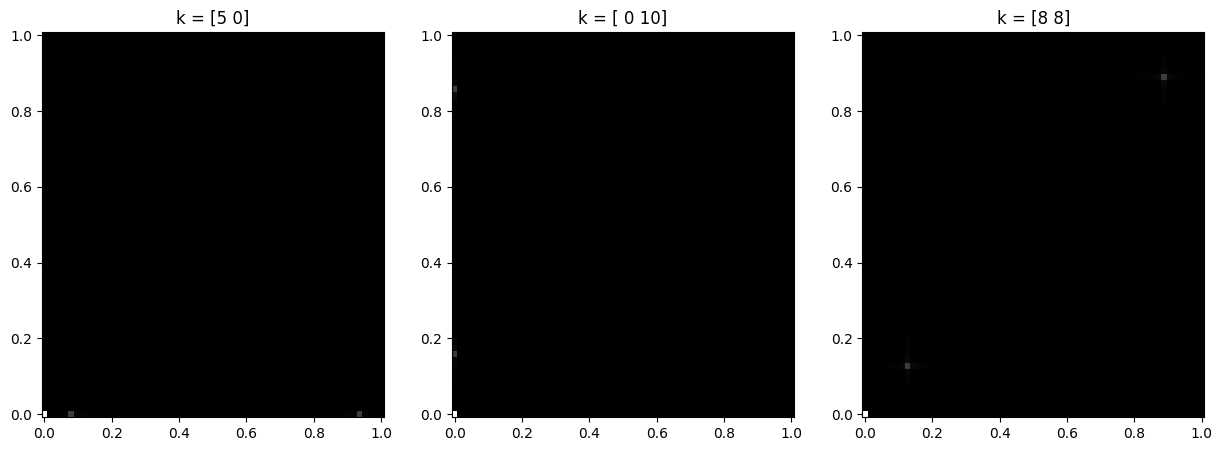

In [139]:
# Define 2D transform
def DFT_2D(F):
    
    # Shape of data
    N_1 = F.shape[0]
    N_2 = F.shape[1]

    # Scaling (I took some creative freedom)
    F_hat = 1 / (N_1*N_2) * sc.fft.fft2(F)
    
    return F_hat

# Make plot of the functions
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for i in range(3):
    abs_DFT = np.abs(DFT_2D(f(X, Y, k_vals[i])))
    ax[i].pcolormesh(X, Y, abs_DFT, cmap='gray')
    ax[i].set_title(f"k = {k_vals[i]}")
plt.show()

### 3c)

We define the 2D Dirichlet kernel as:

$$
    
$$

In the codeblock below we also define 5 matrices that we want to test as filters, namelly:

$$
    \begin{pmatrix}
    0 & -1 & 0 \\     -1 & 4 & -1 \\     0 & -1 & 0 \\
    \end{pmatrix}    ,\quad    \begin{pmatrix}
    -1 & 2 & -1 \\     -1 & 2 & -1 \\     -1 & 2 & -1 \\
    \end{pmatrix}    ,\quad    \begin{pmatrix}
    -1 & -1 & -1 \\     2 & 2 & 2 \\     -1 & -1 & -1 \\
    \end{pmatrix}    ,\quad    \begin{pmatrix}
    1 & 2 & 1 \\     0 & 0 & 0 \\     -1 & -2 & -1 \\
    \end{pmatrix}    ,\quad    \begin{pmatrix}
    1 & 0 & -1 \\     2 & 0 & -2 \\     1 & 0 & -1 \\
    \end{pmatrix}.
$$

We refer to these as $M_1, M_2, \dots, M_5$.

In [140]:
# Define the matrices
M1 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]).T
M2 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]]).T
M3 = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]]).T
M4 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T
M5 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]).T

# Define the 2D Dirichlet kernel
Dn = lambda x, N1, N2 : 0*x + 1 + 2*sum([np.cos(2*np.pi*k*x) for k in range(0, n)]) # 0*x ensures right shape when n = 0


# A function to pad the matrix with 0 to match the matrix N
def extend(M, N):
    """
        The shape of M must be <= to that of N in both dim
    """
    shape = N.shape
    extended = np.zeros(shape)
    extended[0:M.shape[0], 0:M.shape[1]] = M
    return extended

def naive_convolve(M, F):
    return

def FFT_convolve(M, F)

    # Switch domain

    # Multiply

    # Inverse FFT

    return

# M = np.array([[1, 2],[3,4], [5, 6]])
# print(extendnp.array([]))


SyntaxError: expected ':' (126663824.py, line 25)

### 3d)

We remove dot-artefacts by the following strategy:

TODO

In [ ]:


def dot_removal(image_path, resolution=30):
    
    # Set picture parameters
    figsize = (2.8*resolution, resolution)
    fontsize = 4 * resolution

    # Open the image, onvert the to NumPy array, take log
    image = Image.open(image_path)
    image_array = np.log(np.array(image))

    # Make figure
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    ax[0].imshow(image_array, cmap = 'gray')
    ax[1].imshow(image_array, cmap = 'gray')
    
    for i, title in enumerate(["Original", "New"]):
        ax[i].set_title(title, fontsize=fontsize)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    
    plt.tight_layout()
    plt.show()

dot_removal('project1-data/Yarimton-dithered.png', resolution=50)
dot_removal('project1-data/lighthouse-dithered.png', resolution=50)
dot_removal('project1-data/munkholmen-dithered.png', resolution=50)

C:\Users\Trond\AppData\Local\Temp\ipykernel_29936\2014718449.py:11: RuntimeWarning: divide by zero encountered in log
  image_array = np.log(np.array(image))


# Bibliography

https://link.springer.com/book/10.1007/978-3-030-04306-3

